In [1]:
using FileIO, JLD2, PyPlot

In [2]:
path = "/network/aopp/chaos/pred/kloewer/shallowwaters/isambard/"
@load joinpath(path,"benchmarking.jld2") timings experiments nxs stats

4-element Vector{Symbol}:
 :timings
 :experiments
 :nxs
 :stats

In [3]:
gridsize = 1/2 * (nxs .+ 2) .^2

# L1 is 64KiB/core, L2 is 8MiB
L1 = 64*1024*8 / 16
L2 = 8*1024*1024*8 / 16;

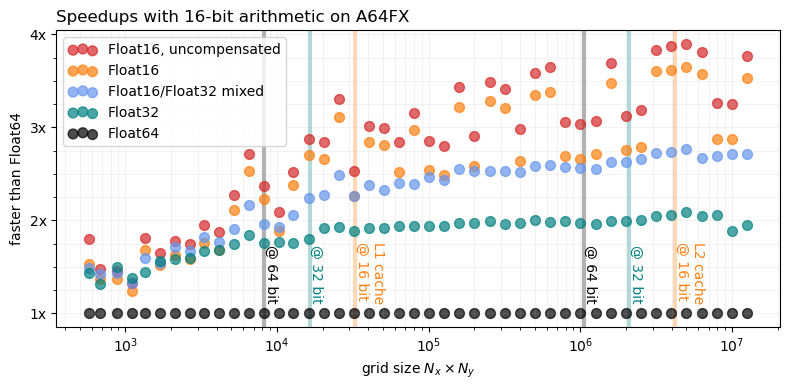

In [13]:
fig,ax = subplots(1,1,figsize=(8,4))
ax.set_xscale("log")

labls = ["Float16","Float16, uncompensated","Float16/Float32 mixed","Float32","Float64"]
colours = ["C1","C3","cornflowerblue","teal","k"]
alfa=0.7

for (i,(e,c,l)) in enumerate(zip(experiments,colours,labls))
    timing_median = timings[end,:,1] ./ timings[i,:,1]
    timing_min = timings[end,:,2] ./ timings[i,:,2]
    timing_max = timings[end,:,3] ./ timings[i,:,3]
    
    ax.scatter(gridsize,timing_median,50,color=c,alpha=alfa)
#     ax.scatter(gridsize,timing_median,50,color=c,alpha=alfa)
end

for i in [2,1,3,4,5]
    ax.scatter(0,1,50,color=colours[i],alpha=alfa,label=labls[i])
end

alfa = 0.3
ax.axvline(L1,color="C1",alpha=alfa,lw=3,zorder=-1)
ax.axvline(L1/2,color="teal",alpha=alfa,lw=3,zorder=-1)
ax.axvline(L1/4,color="k",alpha=alfa,lw=3,zorder=-1)

ax.axvline(L2,color="C1",alpha=alfa,lw=3,zorder=-1)
ax.axvline(L2/2,color="teal",alpha=alfa,lw=3,zorder=-1)
ax.axvline(L2/4,color="k",alpha=alfa,lw=3,zorder=-1)

ax.text(L1,1.1,"L1 cache\n@ 16 bit",rotation=270,va="bottom",color="C1")
ax.text(L1/2,1.1,"@ 32 bit",rotation=270,va="bottom",color="teal")
ax.text(L1/4,1.1,"@ 64 bit",rotation=270,va="bottom",color="k")

ax.text(L2,1.1,"L2 cache\n@ 16 bit",rotation=270,va="bottom",color="C1")
ax.text(L2/2,1.1,"@ 32 bit",rotation=270,va="bottom",color="teal")
ax.text(L2/4,1.1,"@ 64 bit",rotation=270,va="bottom",color="k")


ax.set_xlabel(L"grid size $N_x \times N_y$")
ax.set_ylabel("faster than Float64")
ax.set_title("Speedups with 16-bit arithmetic on A64FX",loc="left")

ax.set_yticks(1:4)
ax.set_yticks(1:0.25:4,minor=true)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%dx"))
ax.grid(alpha=.15,which="both")
ax.legend(loc=2,scatterpoints=3)

tight_layout()


In [19]:
maximum(timings[end,:,:] ./ timings[4,:,:])

2.1178908919069186